In [1]:
# Imports
import os
import kaggle
import pandas as pd
from stable_baselines3.common.env_checker import check_env

from helpers import plot_results, test_market_maker_agent
from environments import SimpleMarketMakingEnv, PPOMarketMakingEnv, DQNMarketMakingEnv, ASMarketMakingEnv, RewardType
from agents import SimpleMarketMaker, PPOMarketMaker, DQNMarketMaker, ASMarketMaker

## Loading Data

!!! Note: if the following part fails, you need to have kaggle authenticated on your computer  
See instructions here: https://www.kaggle.com/docs/api -- Authentication section

In [2]:
file = "./data/BTC_1sec.csv"

if not os.path.exists(file):
    kaggle.api.authenticate()
    kaggle.api.dataset_download_files('martinsn/high-frequency-crypto-limit-order-book-data', path='./data/', unzip=True)
    
dataset = pd.read_csv(file).iloc[:, 1:]
length = 200_000
print(f"dataset of length {length}")

dataset.head()

dataset of length 200000


,system_time,midpoint,spread,buys,sells,bids_distance_0,bids_distance_1,bids_distance_2,bids_distance_3,bids_distance_4,...,asks_market_notional_5,asks_market_notional_6,asks_market_notional_7,asks_market_notional_8,asks_market_notional_9,asks_market_notional_10,asks_market_notional_11,asks_market_notional_12,asks_market_notional_13,asks_market_notional_14
0,2021-04-07 11:32:42.122161+00:00,56035.995,0.01,0.0,0.0,-8.922836e-08,-2.676851e-07,-0.00005,-0.000245,-0.000288,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-04-07 11:32:43.122161+00:00,56035.995,0.01,0.0,0.0,-8.922836e-08,-2.676851e-07,-0.00005,-0.000245,-0.000288,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-04-07 11:32:44.122161+00:00,56035.995,0.01,0.0,0.0,-8.922836e-08,-2.676851e-07,-0.00005,-0.000245,-0.000288,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-04-07 11:32:45.122161+00:00,56035.995,0.01,0.0,0.0,-8.922836e-08,-2.676851e-07,-0.00005,-0.000245,-0.000288,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-04-07 11:32:46.122161+00:00,56035.995,0.01,0.0,0.0,-8.922836e-08,-2.676851e-07,-0.00005,-0.000245,-0.000288,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Environment Description

For each of our examples, different action spaces were necessary, which necessitated we declare different environments. See code included in `./environments.py`.

Here are the main differences:
- The simple agent needs a continuous action space in the shape (ask_price, bid_price)
- The PPO agent needs a multi-discrete space of shape (2, n + 1)
- The DQN agent needs a discrete space of shape (n**2, )

## Agent Description

For each of our examples, different agents were used, some with models, and some without. See code included in `./agents.py`

## Evaluation

In [3]:
def evaluate(env_class, agent_class, label, reward_type: RewardType):
    env = env_class(dataset, initial_cash=5_500_000, initial_inventory=100, trade_volume=1, inventory_penalty=0.001, reward_type=reward_type)
    check_env(env)
    
    # this might take some time because some models might be pre-training
    agent = agent_class(env)
    
    # Run the test
    results = test_market_maker_agent(env, agent, steps=length)
    plot_results([results], [label])
    return results

## Reward 1

### Simple Market Maker

/Users/alix/Documents/school/Poly/INF8250AE/rl-market-making/.venv/lib/python3.12/site-packages/stable_baselines3/common/env_checker.py:461: UserWarning: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) cf. https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html
  warnings.warn(


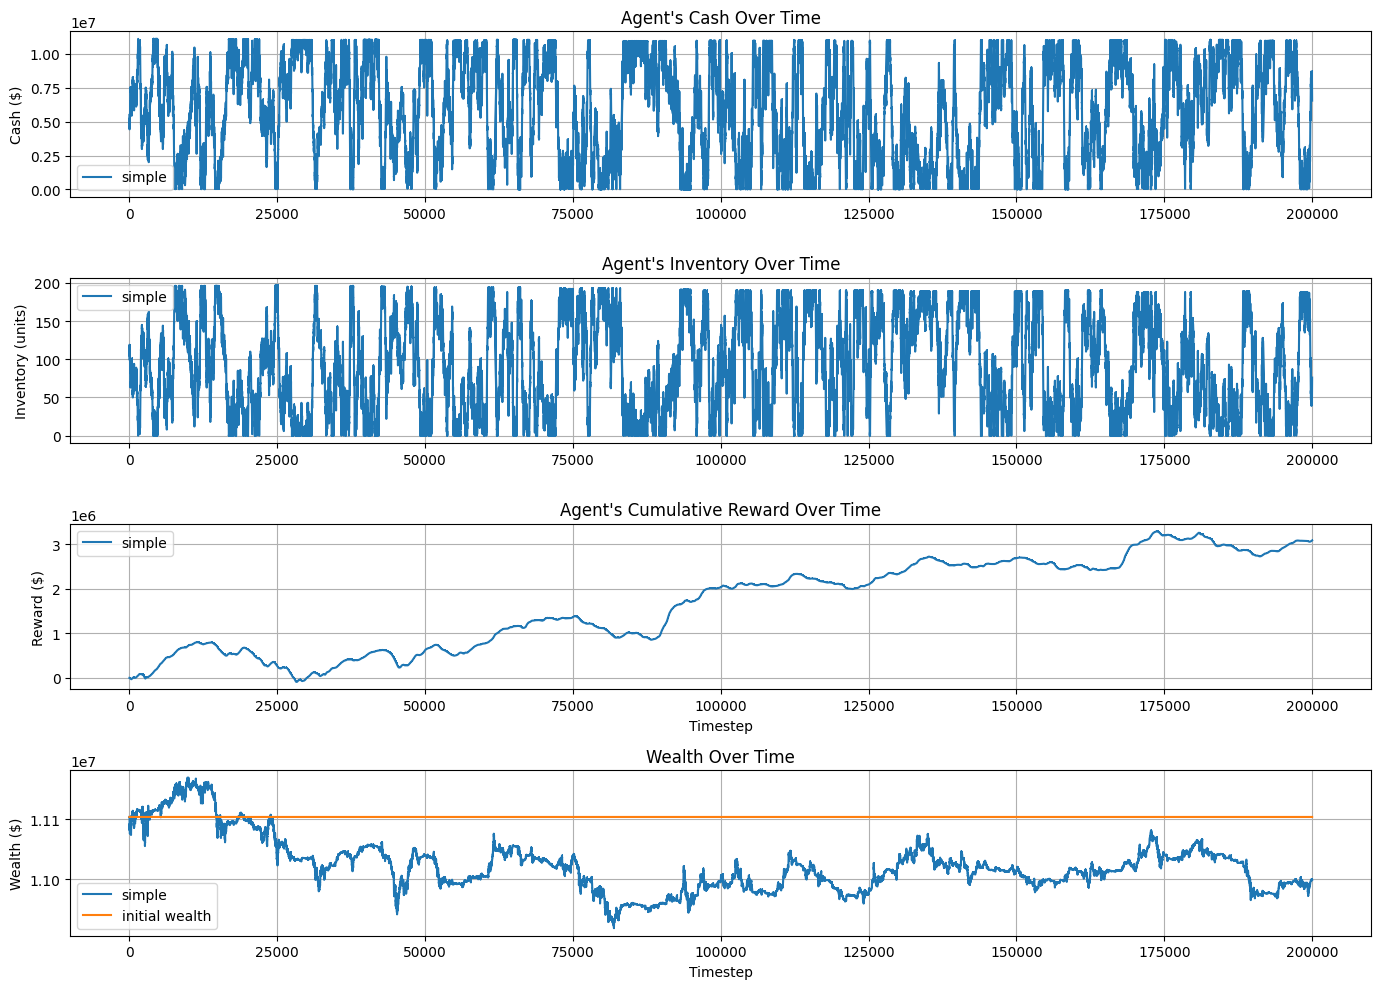

In [4]:
simple_results_1 = evaluate(SimpleMarketMakingEnv, SimpleMarketMaker, "simple", RewardType.REWARD1)

### PPO

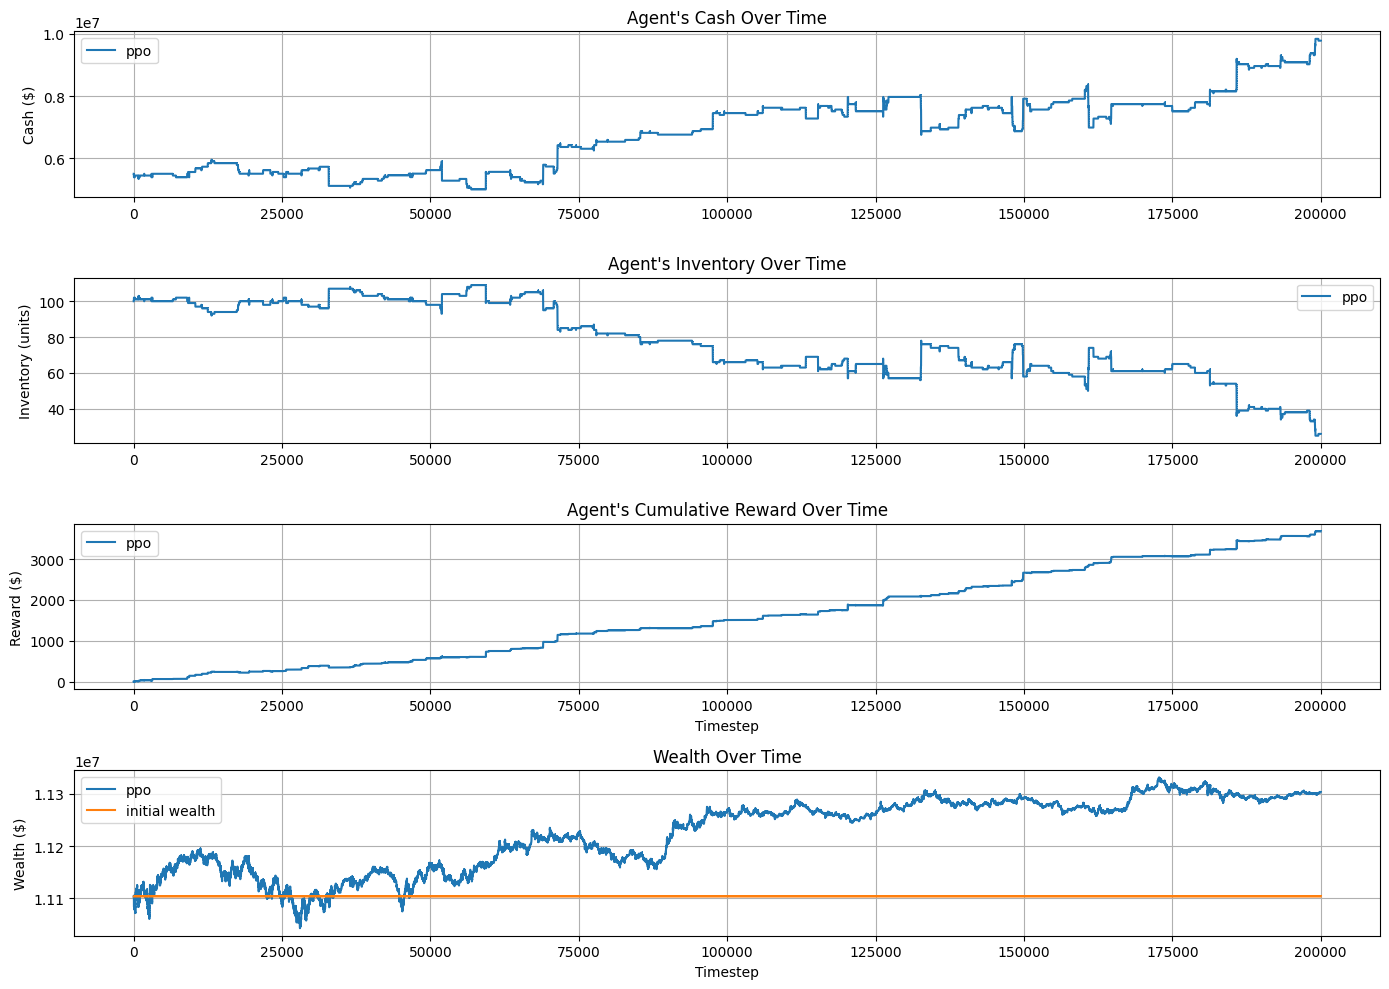

In [5]:
ppo_results_1 = evaluate(PPOMarketMakingEnv, PPOMarketMaker, "ppo", RewardType.REWARD1)

### DQN

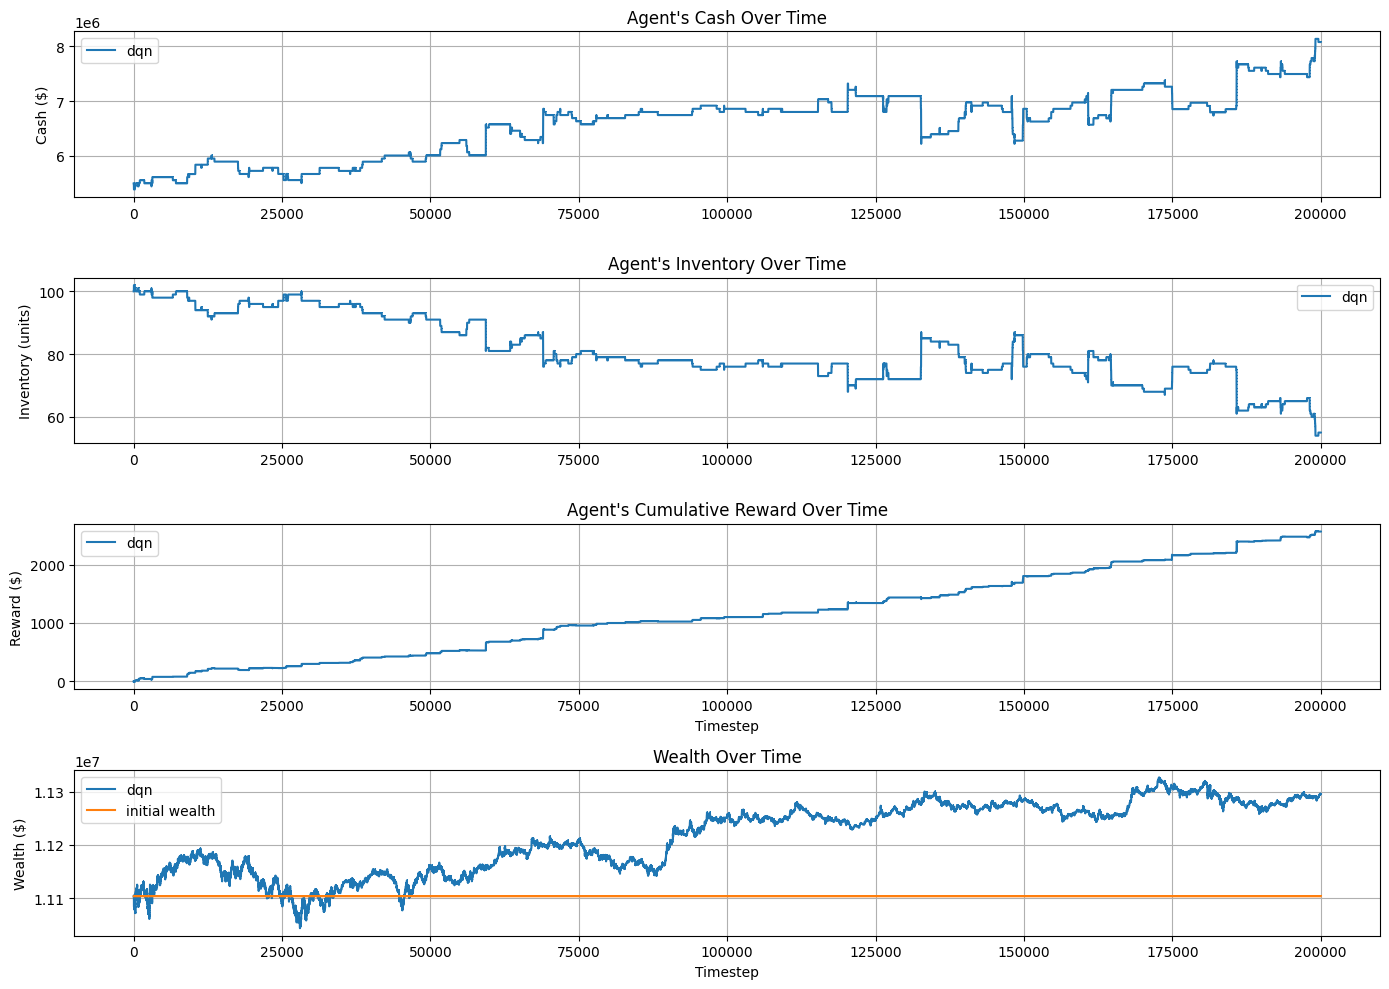

In [6]:
dqn_results_1 = evaluate(DQNMarketMakingEnv, DQNMarketMaker, "dqn", RewardType.REWARD1)

### Avellaneda Stoikov

/Users/alix/Documents/school/Poly/INF8250AE/rl-market-making/.venv/lib/python3.12/site-packages/stable_baselines3/common/env_checker.py:461: UserWarning: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) cf. https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html
  warnings.warn(


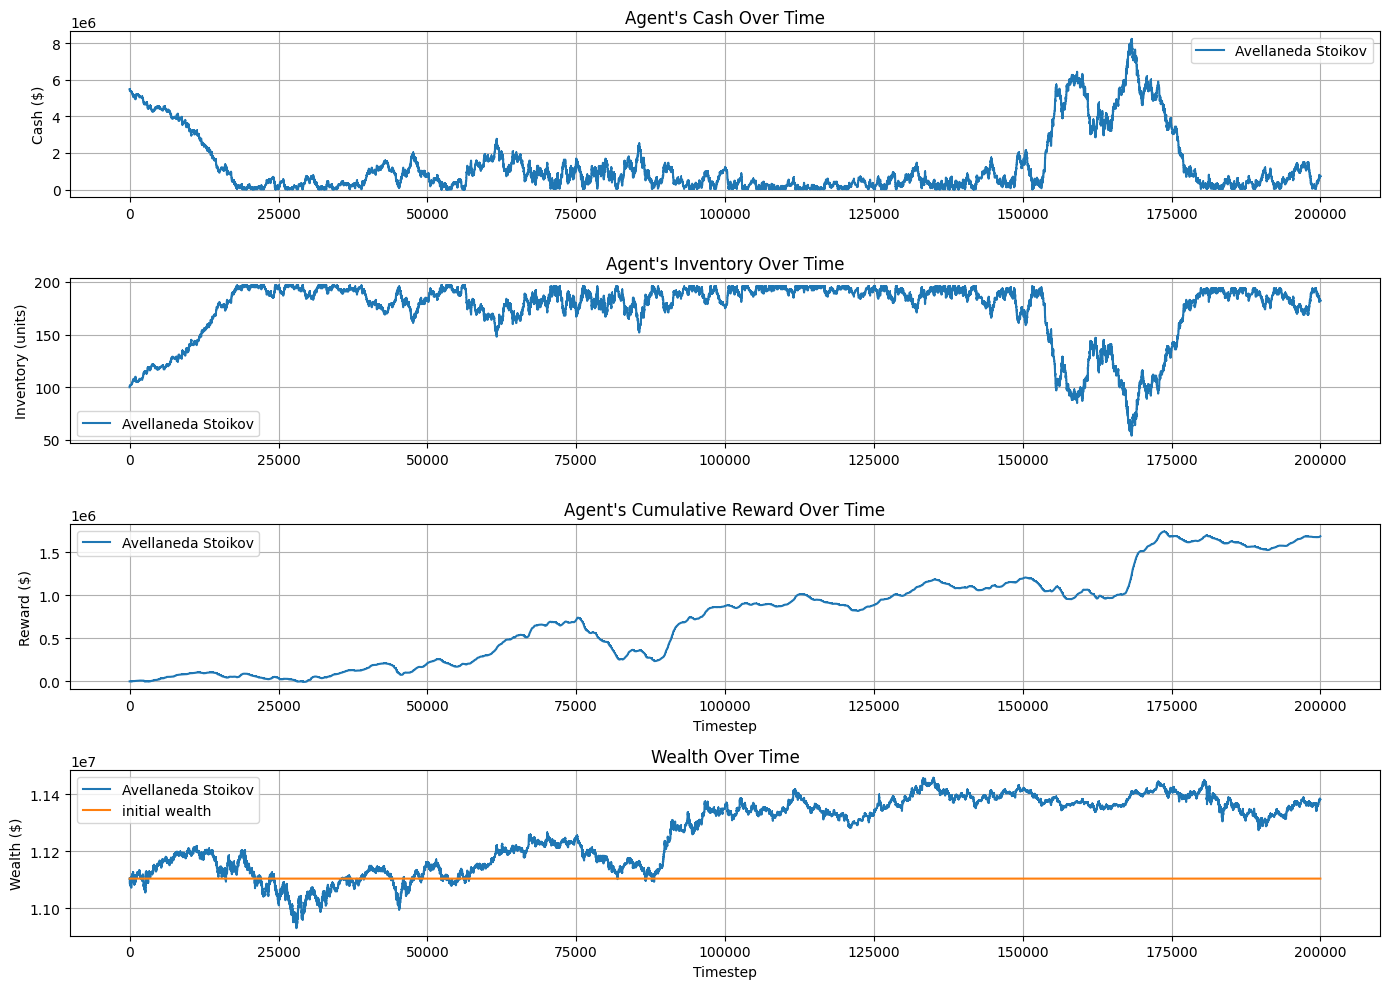

In [7]:
as_results_1 = evaluate(ASMarketMakingEnv, ASMarketMaker, "Avellaneda Stoikov", RewardType.REWARD1)

## Comparison

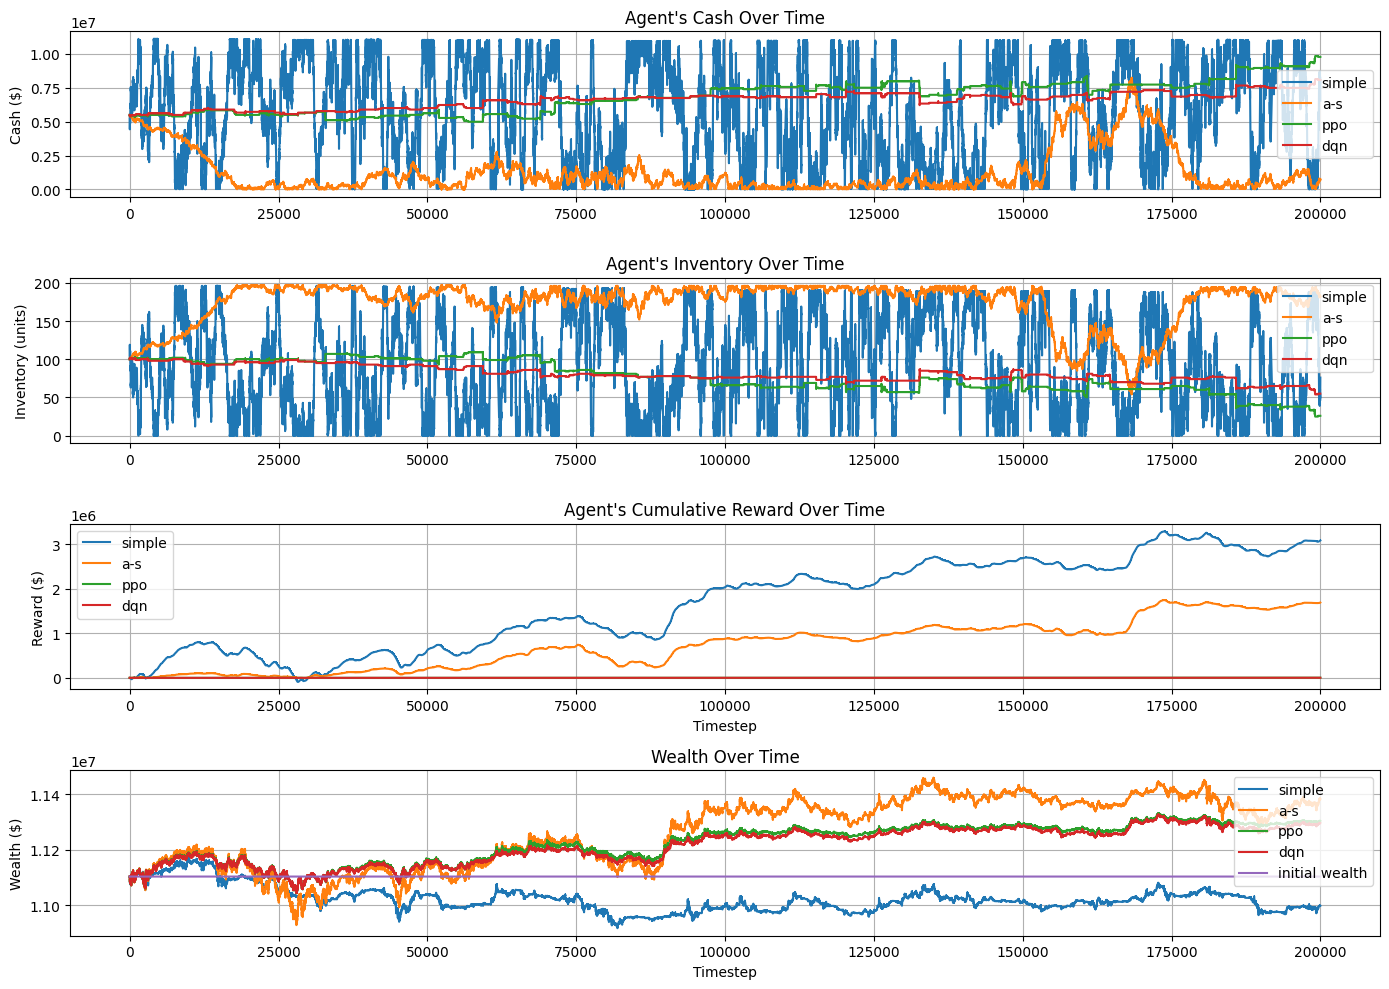

In [8]:
plot_results([simple_results_1, as_results_1, ppo_results_1, dqn_results_1], ["simple", "a-s", "ppo", "dqn"])

## Reward 2

Because the simple market maker and Avellaneda Stoikov are not dependant on the reward, they will give the same result if only the reward function is changed.

### Simple Market Maker

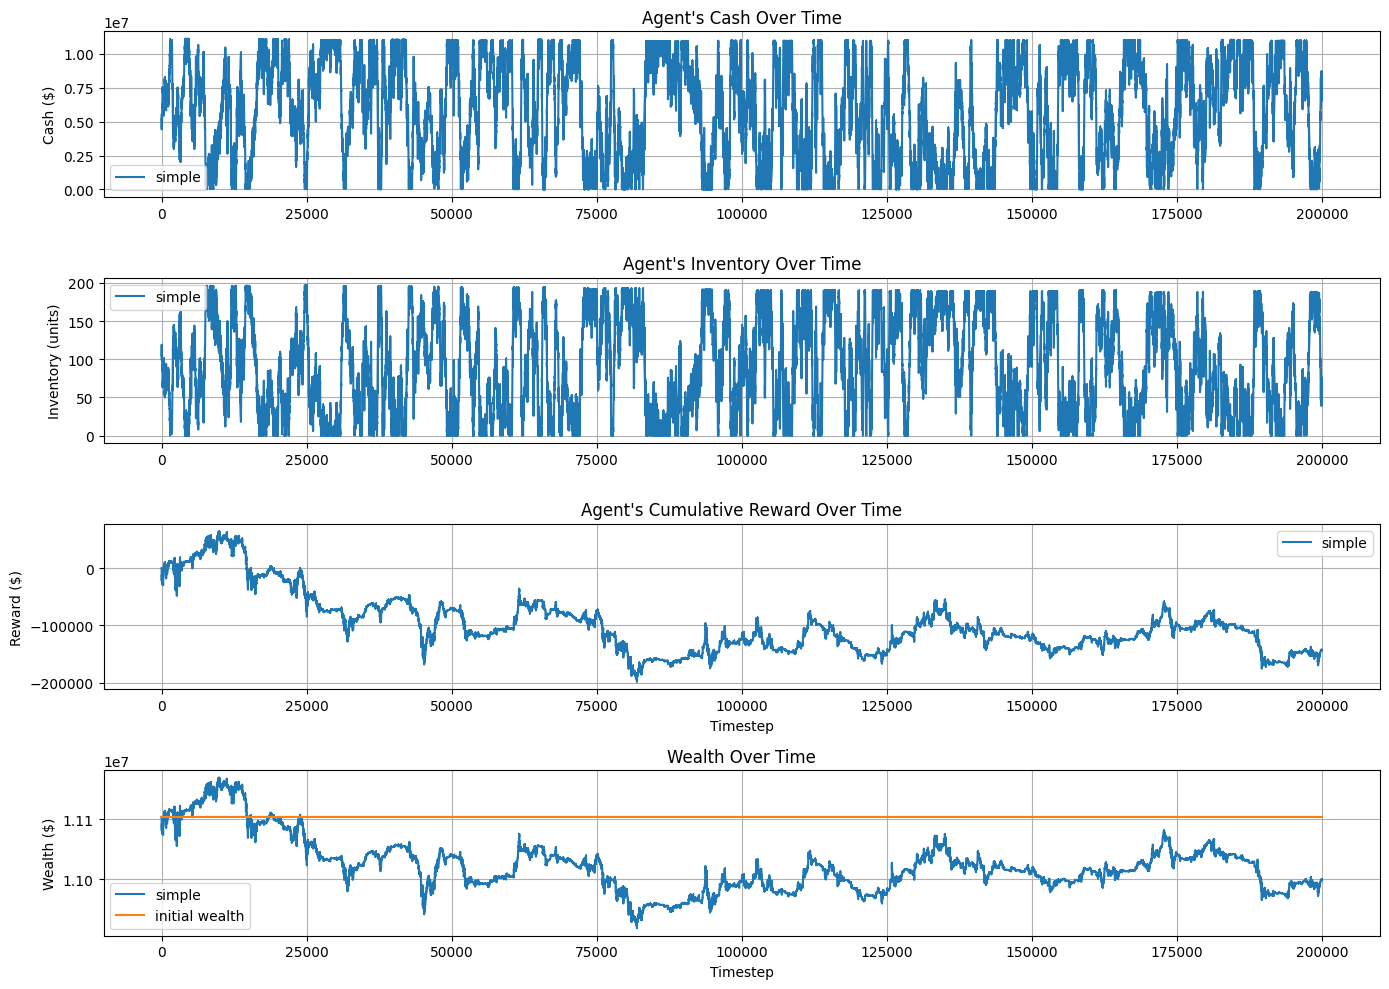

In [9]:
simple_results_2 = evaluate(SimpleMarketMakingEnv, SimpleMarketMaker, "simple", RewardType.REWARD2)

### PPO

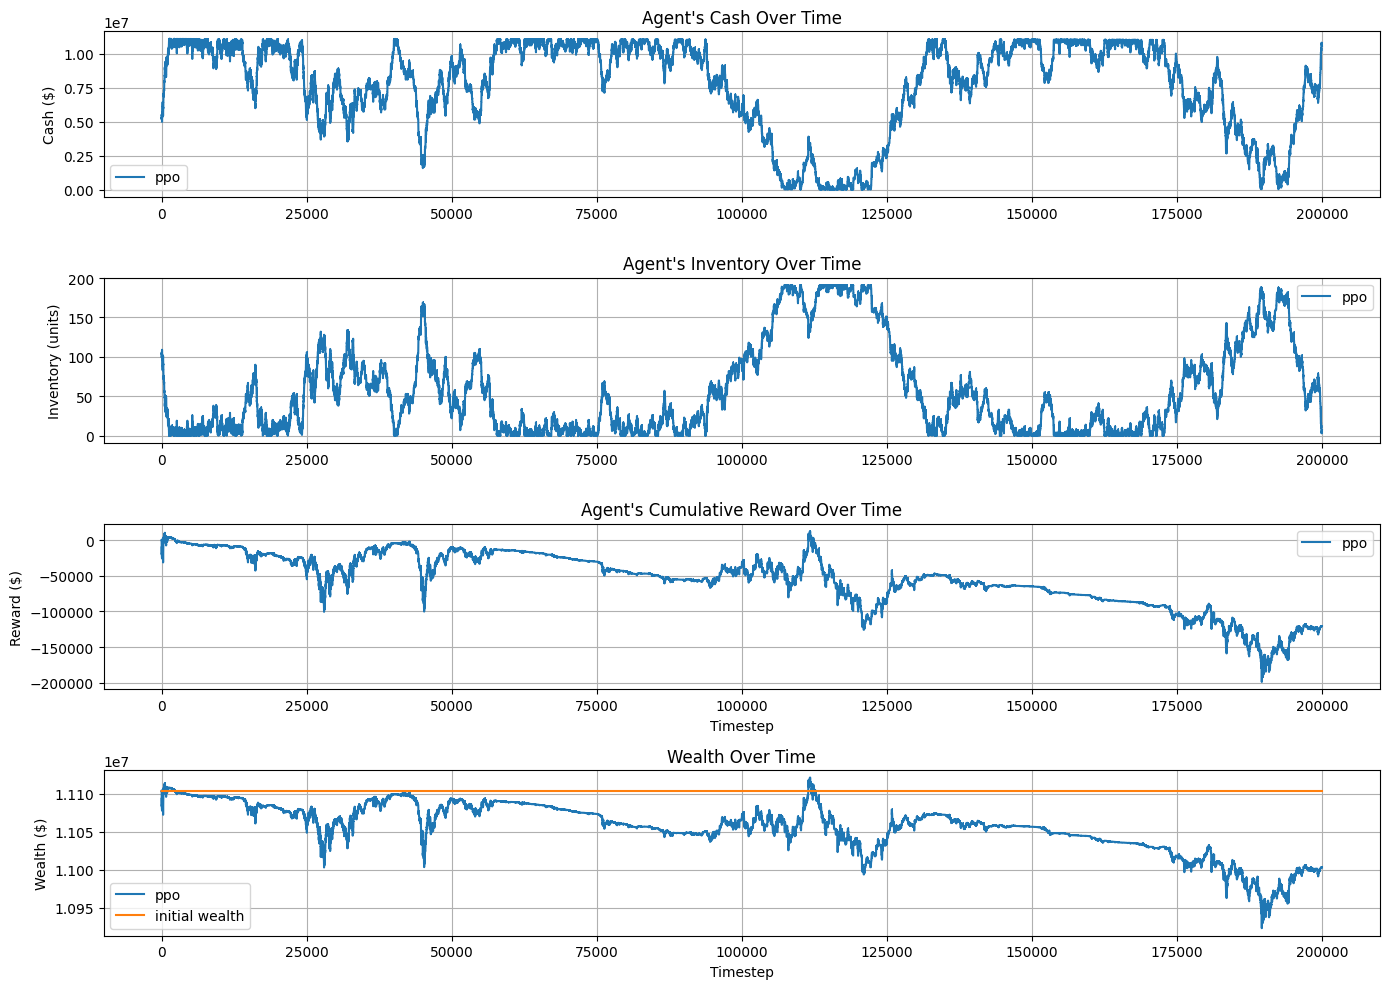

In [10]:
ppo_results_2 = evaluate(PPOMarketMakingEnv, PPOMarketMaker, "ppo", RewardType.REWARD2)

### DQN

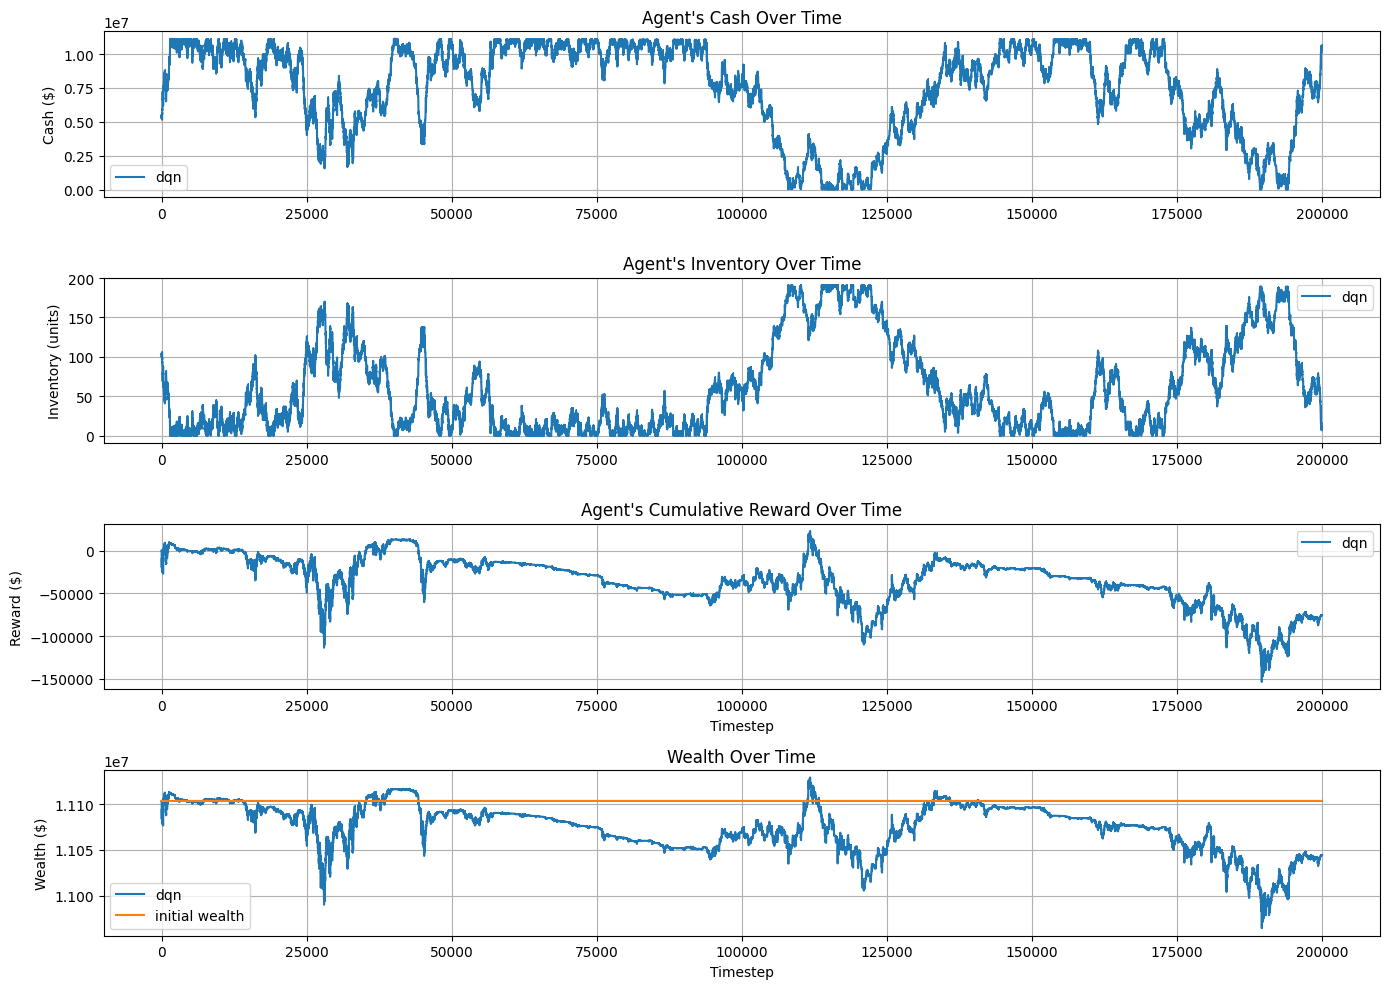

In [11]:
dqn_results_2 = evaluate(DQNMarketMakingEnv, DQNMarketMaker, "dqn", RewardType.REWARD2)

### Avellaneda Stoikov

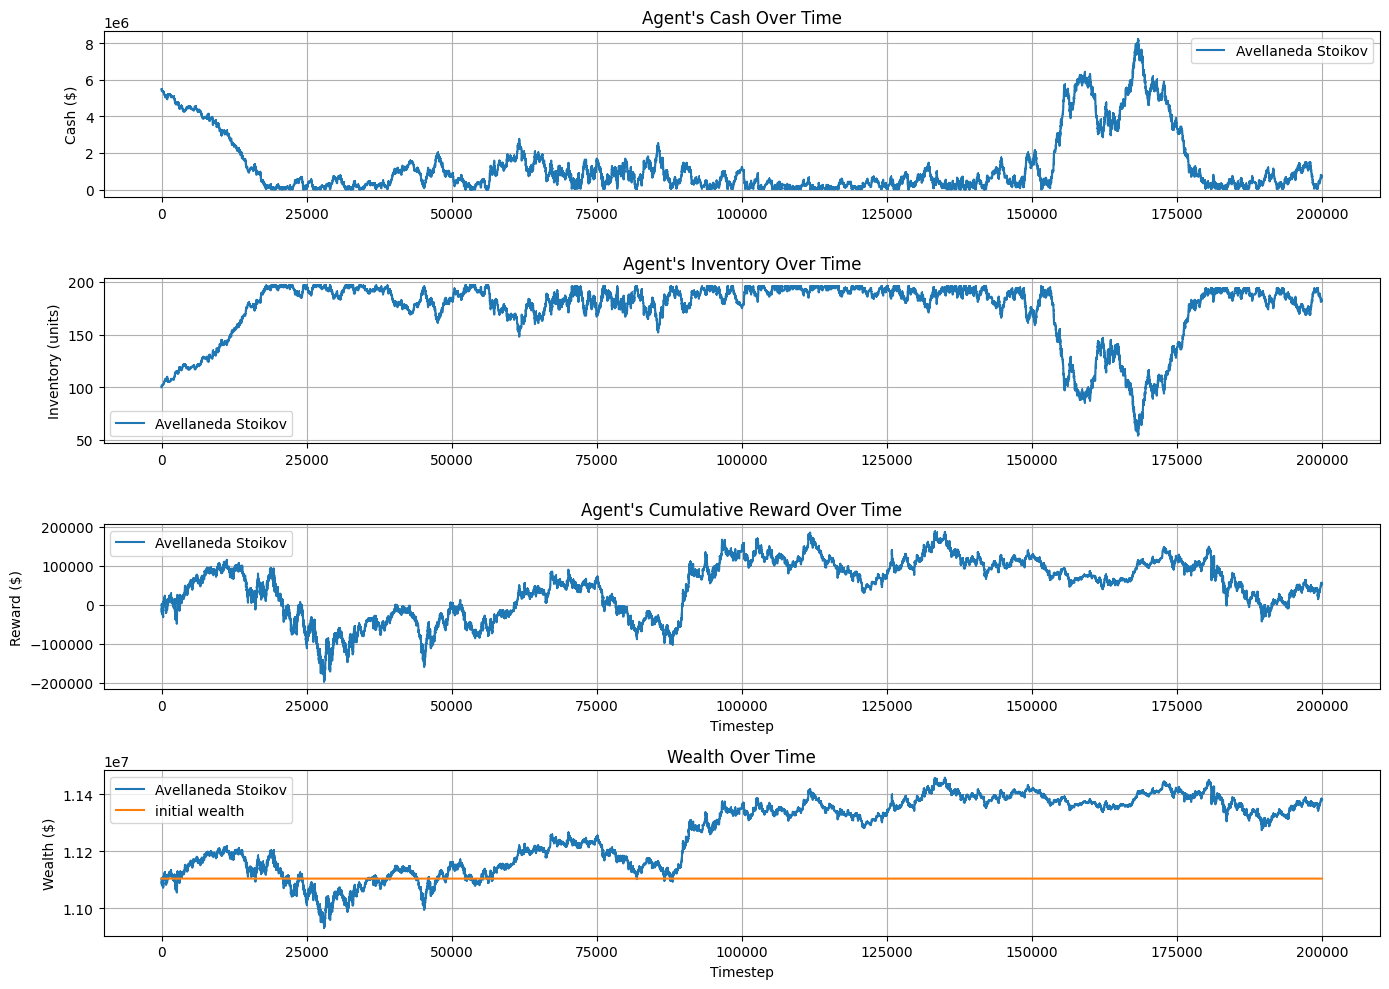

In [12]:
as_results_2 = evaluate(ASMarketMakingEnv, ASMarketMaker, "Avellaneda Stoikov", RewardType.REWARD2)

## Comparison

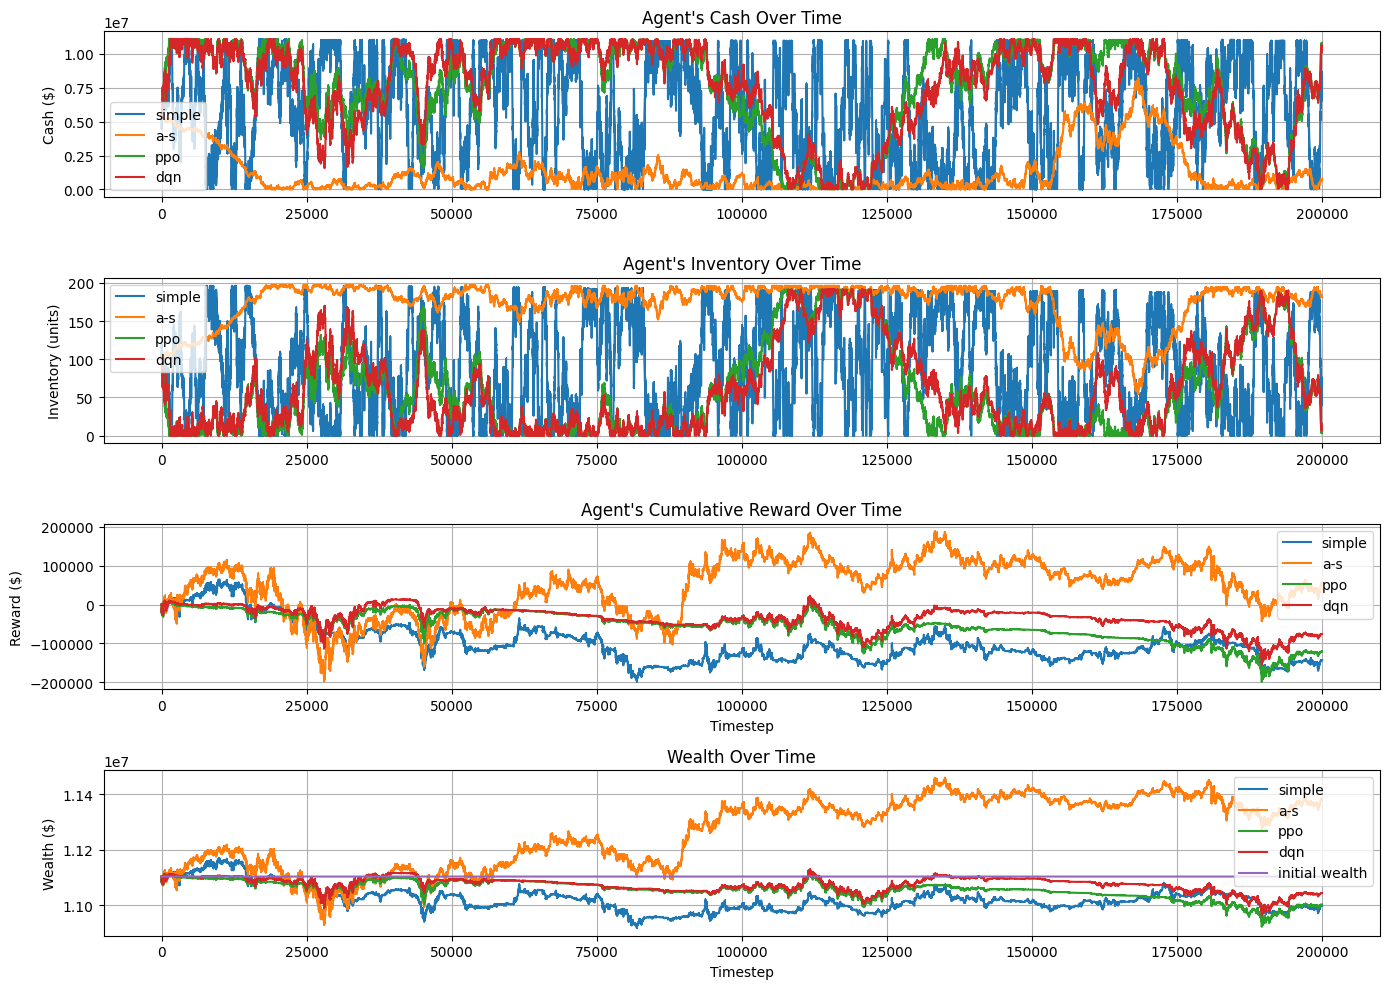

In [13]:
plot_results([simple_results_2, as_results_2, ppo_results_2, dqn_results_2], ["simple", "a-s", "ppo", "dqn"])

## Final Comparison

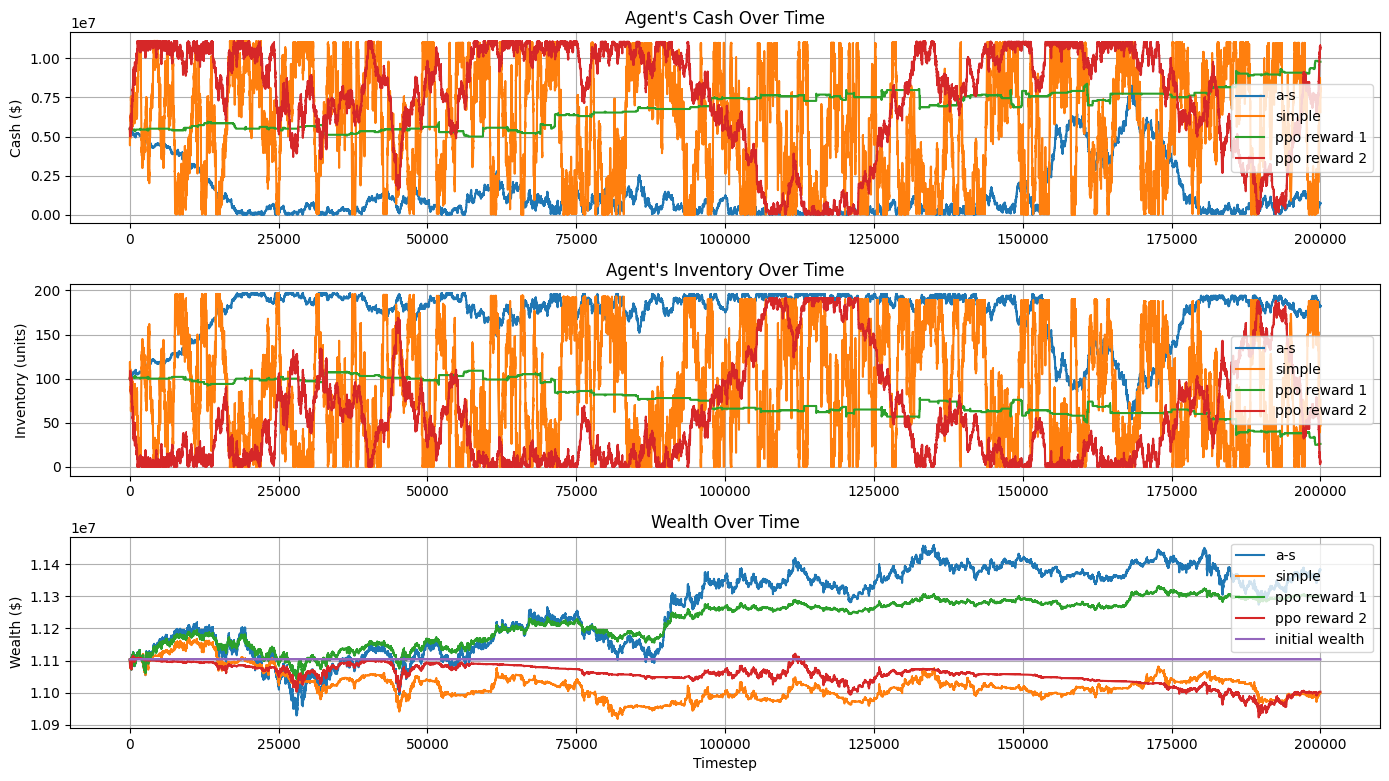

In [14]:
plot_results([as_results_1, simple_results_1, ppo_results_1, ppo_results_2], ["a-s", "simple", "ppo reward 1", "ppo reward 2"], no_reward=True)